<a href="https://colab.research.google.com/github/Amitabh1989/frozenlake_reinforcement_learning/blob/main/Neural_Network_Sequential_Model_on_Frozen_Lake_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

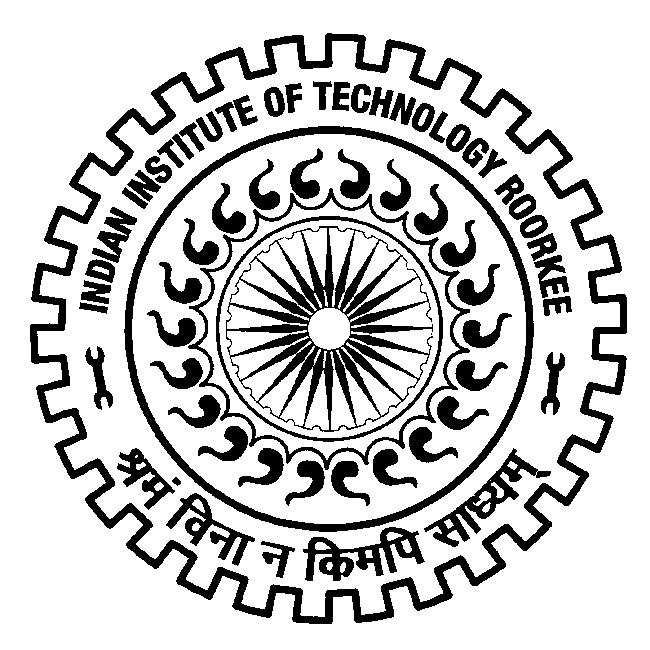 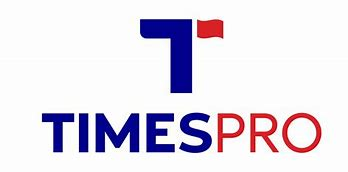

# **IIT-R and Times TSW Capstone Project**

---
**by Amitabh Suman**

# **Open AI Gym : Reinforcement Learning**

**Frozen Lake Problem : With Neural Networks**

In [14]:
# Basic Imports

import gym
import numpy as np
import tensorflow as tf
import random
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.initializers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

**Initialize the Environment and Define the Neural Network (Keras Sequential)**

In [5]:
env = gym.make('FrozenLake-v1')

learning_rate = 0.0001
discount_rate = 0.99
random_action_chance = 0.1
num_episodes = 1000
max_episode_step = 100
log_interval = 100

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
env.action_space

Discrete(4)

In [7]:
env.observation_space

Discrete(16)

**Build a Keras Sequential Model and display the details**

In [19]:

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(16,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

# Build the model
model.build(input_shape=(None, 16))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_12 (ModuleWr  (None, 16)               272       
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 32)               544       
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 16)               528       
 apper)                                                          
                                                                 
 module_wrapper_15 (ModuleWr  (None, 4)                68        
 apper)                                                          
                                                                 
Total params: 1,412
Trainable params: 1,412
Non-traina

**Train the neural network and display information as necessary**

In [23]:
env = gym.make('FrozenLake-v1')

learning_rate = 0.0001
discount_rate = 0.99
epsilon = 1
epsilon_reduce = 0.995 
num_episodes = 1000
max_episode_step = 100
log_interval = 100

rewards_from_episodes = []

for episode in range(num_episodes):
    observation = env.reset()
    episode_reward = 0
    if episode % log_interval == 0 and episode > 0:
        print('Episode: {}, Reward: {}'.format(episode, sum(
            rewards_from_episodes[episode - log_interval: episode]) / log_interval))

    for step in range(max_episode_step):
        # Select action
        targetQ = model.predict(np.identity(16)[observation:observation + 1], batch_size=1)

        # Get Best castion
        action = np.argmax(targetQ)

        # Check if exploration or exploitation is to be done
        if random.random() < epsilon:
            action = env.action_space.sample()

        # Perform Action
        new_observation, reward, done, _ = env.step(action)

        # Predict new Q value of the New state
        Qnew = model.predict(np.identity(16)[new_observation:new_observation + 1], batch_size=1)

        # Get the max Qvalue for the next state
        maxQvalue = np.max(Qnew)

        # Update the Q-table
        targetQ[0, action] = reward + discount_rate * maxQvalue

        # Train network using target and predicted Q values
        model.fit(np.identity(16)[observation:observation + 1], targetQ, epochs=1, batch_size=1, verbose=0)

        episode_reward += reward
        observation = new_observation
        if done:
          # Decay the epsilon
            epsilon = epsilon * epsilon_reduce
            break

    rewards_from_episodes.append(episode_reward)
    print('Episode: {}, Episode Reward: {}'.format(episode, episode_reward))
    print('Episode: {}, Total Reward  : {}\n\n'.format(episode, sum(rewards_from_episodes)))

print("Mean of all episodes: {}%".format(sum(rewards_from_episodes) / num_episodes))

1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 32ms/step
Episode: 666, Episode Reward: 0.0
Episode: 666, Total Reward  : 18.0


1/1 [==============================] - 0s 27ms/step
Episode: 667, Episode Reward: 0.0
Episode: 667, Total Reward  : 18.0


1/1 [==============================] - 0s 25ms/step
Episode: 668, Episode Reward: 0.0
Episode: 668, Total Reward  : 18.0


1/1 [==============================] - 0s 36ms/step
Episode: 669, Episode Reward: 0.0
Episode: 669, Total Reward  : 18.0


1/1 [==============================] - 0s 28ms/step
Episode: 670, Episode Reward: 0.0
Episode: 670, Total Reward  : 18.0


1/1 [==============================] - 0s 40ms/step
Episode: 671, Episode Reward: 0.0
Episode: 671, Total Reward  : 18.0


1/1 [==============================] - 0s 44ms/step
Episode: 672, Episode Reward: 0.0
Episode: 672, Total Reward  : 18.0


1/1 [==============================] - 0s 59ms/step
Episode: 673, Episode Reward: 0.0
Ep

As you can see from logs that initially the agent did not collect any reward but as the training progresses, the agent keeps receiving rewards and episode lenght decreases.

This signifies that agent is able to learn better with more training and model is converging to optimum path more as the training progresses.

**Thank you !**